In [11]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [9]:
torch.manual_seed(666)  # reproducible

# Hyper Parameters
epochs = 1
batchsz = 64
TIME_STEP = 28 
INPUT_SIZE = 28 
learning_rate = 1e-2

In [18]:
train_db=datasets.MNIST('./data/mnist_data/',train=True,download=True,
                          transform=transforms.ToTensor())
train_data=DataLoader(dataset=train_db,batch_size=batchsz,shuffle=True)

test_db=datasets.MNIST('./data/mnist_data/',train=False,download=True,
                          transform=transforms.ToTensor())
test_x = test_db.data.type(torch.FloatTensor)[:2000]/255.   # shape (2000, 28, 28) value in range(0,1)
test_y = test_db.targets.numpy()[:2000]    # covert to numpy array

torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5, 1.0, '5')

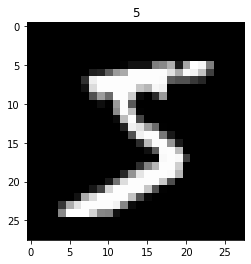

In [8]:
# plot one example
# x,label = iter(train_db).next()
print(train_db.data.size())  # (60000, 28, 28)
print(train_db.targets.size())  # (60000)
plt.imshow(train_db.data[0].numpy(),cmap='gray')
plt.title('%i' % train_db.targets[0])
plt.show()

In [10]:
class RNN(nn.Module):
    
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.LSTM(
            input_size = INPUT_SIZE,
            hidden_size = 64,
            num_layers = 1,
            batch_first = True,  # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        
        self.fc = nn.Linear(64,10)
        
    def forward(self,x):
        # x shape = (batch, time_step, input_size)
        # r_out shape = (batch, time_step, output_size)
        # h_n shape = (n_layers, batch, hidden_size)
        # h_c shape = (n_layers, batch, hidden_size)
        r_out,(h_n,h_c) = self.rnn(x,None)  # None represents zero initial hidden state
        
        # choose r_out at last time step
        out = self.fc(r_out[:,-1,:])
        return out

In [12]:
rnn = RNN()
print(rnn)

optimizer = optim.Adam(rnn.parameters(),lr=learning_rate)
criterion = nn.CrossEntropyLoss()

RNN(
  (rnn): LSTM(28, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=10, bias=True)
)


In [19]:
for epoch in range(epochs):
    
    for step,(b_x,b_y) in enumerate(train_data):
        b_x = b_x.view(-1,28,28)
        
        output = rnn(b_x)
        loss = criterion(output,b_y)
        
        optimizer.zero_grad()  # clear gradients for this training step
        loss.backward()        # backpropagation, compute gradients
        optimizer.step()       # apply gradients
        
        if step % 50 ==0:
            test_output = rnn(test_x)   # (samples, time_step, input_size)
            pred_y = torch.max(test_output,1)[1].data.numpy()
            accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), 
                  '| test accuracy: %.2f' % accuracy)

Epoch:  0 | train loss: 0.3495 | test accuracy: 0.83
Epoch:  0 | train loss: 0.4439 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3633 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2231 | test accuracy: 0.91
Epoch:  0 | train loss: 0.3863 | test accuracy: 0.90
Epoch:  0 | train loss: 0.3121 | test accuracy: 0.92
Epoch:  0 | train loss: 0.1172 | test accuracy: 0.92
Epoch:  0 | train loss: 0.2029 | test accuracy: 0.93
Epoch:  0 | train loss: 0.3967 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1767 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1434 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1667 | test accuracy: 0.93
Epoch:  0 | train loss: 0.0945 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0993 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1506 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0800 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2226 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1781 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1372 | test accuracy

In [22]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1,28,28))
pred_y = torch.max(test_output,1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
